# Testing queries

### Libraries

In [1]:
%cd .. 

c:\Users\josub\Desktop\BDMA\Brussels\Advanced Databases\PROJECT\SearchEngines_benchmark


In [3]:
import pandas as pd
import pyodbc
import time
import datetime
import seaborn as sns
import matplotlib.pyplot as plt
import pickle

In [13]:
from src import queries_copy
import importlib

# Reload the specific module
importlib.reload(queries_copy)

# Access the updated query_dictionary
query_dictionary = queries_copy.query_dictionary
query_dictionary

{1: "\n            SELECT TOP 20 id, Score\n            FROM comments\n            WHERE text LIKE '%python%'\n            ORDER BY Score DESC;\n            ",
 2: "\n            SELECT TOP 20 id, Score\n            FROM posts \n            WHERE title LIKE '%python%' AND ClosedDate!=0\n            ORDER BY Score DESC;\n            ",
 3: "\n            SELECT TOP 20 AccountId, Reputation, LastAccessDate\n            FROM users\n            WHERE (AboutMe LIKE '%python%' AND AboutMe LIKE '%sql%') AND (AboutMe LIKE '%java%' OR AboutMe LIKE '%javascript%')\n            ORDER BY Reputation DESC, LastAccessDate DESC\n",
 4: "\n            SELECT TOP 20 id\n            FROM posts\n            WHERE (Body LIKE '%python%' OR Body LIKE '%sql%') AND FavoriteCount>3;\n            ",
 5: "\n            SELECT TOP 20 id, CreationDate\n            FROM comments\n            WHERE text LIKE '%python%' AND text NOT LIKE '%sql%' AND CreationDate LIKE '2008%' ;\n            ",
 6: '',
 7: "\n          

### Connect to data base

In [8]:
# Connect to SQL Server
conn = pyodbc.connect('DRIVER={ODBC Driver 18 for SQL Server};'
                      'SERVER=localhost,1433;'
                      'DATABASE=StackOverflowMini;'
                      'UID=sa;'
                      'PWD=<YourStrong@Passw0rd>;'
                      'TrustServerCertificate=yes;')
cursor = conn.cursor()

### Executing queries test
This first step measures performance when extracting the whole table.

In [ ]:
# Initialize a list to hold query metrics
query_metrics = []
TIMES=1
# Run benchmarks
for i in range(len(query_dictionary)):
    query = query_dictionary[i+1]
    
    print(f"Executing: {i+1}")
    start_time = time.time()
    if i+1 in [6, 8, 10, 12, 15, 18]:
        continue
    for j in range(TIMES):
        cursor.execute(query)
        results = cursor.fetchall()
    end_time = time.time()
    
    # Collect execution time
    execution_time = end_time - start_time
    
    # Get number of rows and columns
    columns = [column[0] for column in cursor.description]  # Get column names
    num_rows = len(results)
    num_columns = len(columns)
    
    # Append metrics to the list
    query_metrics.append({
        'query_id':i+1,
        'query': query,
        'execution_time': execution_time,
        'num_rows': num_rows,
        'num_columns': num_columns
    })

# Convert to pandas DataFrame

df = pd.DataFrame(query_metrics)
df


Executing: 1
Executing: 2
Executing: 3
Executing: 4
Executing: 5
Executing: 6
Executing: 7
Executing: 8
Executing: 9
Executing: 10
Executing: 11
Executing: 12
Executing: 13
Executing: 14


,query_id,query,execution_time,num_rows,num_columns
0,1,"\n SELECT TOP 20 id, Score\n ...",12.527868,20,2
1,2,"\n SELECT TOP 20 id, Score\n ...",0.358053,20,2
2,3,"\n SELECT TOP 20 AccountId, Reputat...",0.758709,20,3
3,4,\n SELECT TOP 20 id\n FR...,0.020330,20,1
4,5,"\n SELECT TOP 20 id, CreationDate\n...",21.637632,0,2
5,7,\n SELECT TOP 20 *\n FRO...,0.048742,20,20
6,9,"\n SELECT TOP 20 id, Score\n ...",2.201137,1,2
7,11,"\n SELECT TOP 20 id, Score\n ...",324.176021,20,2
8,13,\nSELECT \n CASE\n WHEN Body LIKE '%...,487.251085,7,2
9,14,\nSELECT \n CASE\n WHEN Text LIKE '%...,102.048705,7,2


## Visualization of results

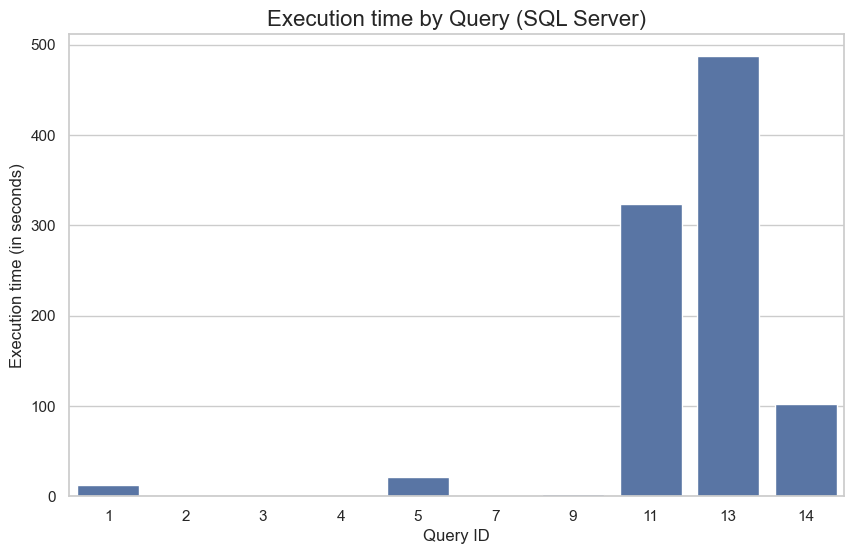

In [15]:
plt.figure(figsize=(10, 6))  # Set figure size
sns.set(style="whitegrid")  # Set the style for the plot
sns.barplot(data=df, x='query_id', y='execution_time')
# Add title and labels
plt.title("Execution time by Query (SQL Server)", fontsize=16)
plt.xlabel("Query ID", fontsize=12)
plt.ylabel("Execution time (in seconds)", fontsize=12)
# Show the plot
plt.show()